## RAG

## Установка и импорт нужных библиотек

In [ ]:
!pip install -q torch transformers accelerate bitsandbytes langchain sentence-transformers faiss-cpu openpyxl pacmap datasets langchain-community ragatouille

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 32.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.9/490.9 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from tqdm.notebook import tqdm
import pandas as pd
from typing import Optional, List, Tuple
from datasets import Dataset
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", None)  # Полезно при визуализации результатов поиска

## Датасет

Датасет m-ric/huggingface_doc представляет собой коллекцию документов, собранных для оценки и обучения моделей обработки естественного языка. Он представляет собой спарсенные страницы туториалов с HuggingFace (HF) и ссылки на них. На основе этих данных мы будем строить RAG систему, которая бы консультировала нас по HF.

In [ ]:
import datasets

ds = datasets.load_dataset("m-ric/huggingface_doc", split="train")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

huggingface_doc.csv:   0%|          | 0.00/22.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2647 [00:00<?, ? examples/s]

In [ ]:
df = ds.to_pandas()
df.head(1)

,text,source
0,"Create an Endpoint\n\nAfter your first login, you will be directed to the [Endpoint creation page](https://ui.endpoints.huggingface.co/new). As an example, this guide will go through the steps to deploy [distilbert-base-uncased-finetuned-sst-2-english](https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english) for text classification. \n\n## 1. Enter the Hugging Face Repository ID and your desired endpoint name:\n\n<img src=""https://raw.githubusercontent.com/huggingface/hf-endpoints-documentation/main/assets/1_repository.png"" alt=""select repository"" />\n\n## 2. Select your Cloud Provider and region. Initially, only AWS will be available as a Cloud Provider with the `us-east-1` and `eu-west-1` regions. We will add Azure soon, and if you need to test Endpoints with other Cloud Providers or regions, please let us know.\n\n<img src=""https://raw.githubusercontent.com/huggingface/hf-endpoints-documentation/main/assets/1_region.png"" alt=""select region"" />\n\n## 3. Define the [Security Level](security) for the Endpoint:\n\n<img src=""https://raw.githubusercontent.com/huggingface/hf-endpoints-documentation/main/assets/1_security.png"" alt=""define security"" />\n\n## 4. Create your Endpoint by clicking **Create Endpoint**. By default, your Endpoint is created with a medium CPU (2 x 4GB vCPUs with Intel Xeon Ice Lake) The cost estimate assumes the Endpoint will be up for an entire month, and does not take autoscaling into account.\n\n<img src=""https://raw.githubusercontent.com/huggingface/hf-endpoints-documentation/main/assets/1_create_cost.png"" alt=""create endpoint"" />\n\n## 5. Wait for the Endpoint to build, initialize and run which can take between 1 to 5 minutes.\n\n<img src=""https://raw.githubusercontent.com/huggingface/hf-endpoints-documentation/main/assets/overview.png"" alt=""overview"" />\n\n## 6. Test your Endpoint in the overview with the Inference widget 🏁 🎉!\n\n<img src=""https://raw.githubusercontent.com/huggingface/hf-endpoints-documentation/main/assets/1_inference.png"" alt=""run inference"" />\n",huggingface/hf-endpoints-documentation/blob/main/docs/source/guides/create_endpoint.mdx


Формируем наш датасет в нужном формате. Т.к. для работы мы выбрали LangChain - популярный фреймворк, который позволяет из коробки разворачивать LLM-пайплайны, воспользуемся функцией LangchainDocument

In [ ]:
from langchain.docstore.document import Document as LangchainDocument

RAW_KNOWLEDGE_BASE = [
    LangchainDocument(page_content=doc["text"], metadata={"source": doc["source"]}) for doc in tqdm(ds)
]

  0%|          | 0/2647 [00:00<?, ?it/s]

## Ретривер

Ретривер работает как внутренний поисковик: по запросу пользователя он возвращает несколько релевантных фрагментов из базы знаний. Эти фрагменты затем используются Ридером для генерации ответа.

Цель — найти наиболее подходящие фрагменты для ответа на вопрос пользователя. Важно определить, сколько фрагментов (top_k) нужно извлекать и какой должна быть их длина (chunk size).

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Мы используем иерархический список разделителей, специально предназначенных для разделения документов Markdown
# Этот список взят из класса MarkdownTextSplitter в LangChain

MARKDOWN_SEPARATORS = [
    "\n#{1,6} ",
    "```\n",
    "\n\\*\\*\\*+\n",
    "\n---+\n",
    "\n___+\n",
    "\n\n",
    "\n",
    " ",
    "",
]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,  # Максимальное количество символов в чанке
    chunk_overlap=100,  # Количество символов, которые будут перекрываться между чанками
    add_start_index=True,  # Если "True", то включает начальный индекс чанка в метаданные
    strip_whitespace=True,  # Если значение "True", то пробелы удаляются из начала и конца каждого документа
    separators=MARKDOWN_SEPARATORS,
)

docs_processed = []
for doc in RAW_KNOWLEDGE_BASE:
    docs_processed += text_splitter.split_documents([doc])

Мы также должны иметь в виду, что при векторизации документов мы будем использовать модель с определенным контекстным окном (max_seq_length).

Поэтому мы должны убедиться, что размеры наших чанков не превышают этого предела, потому что любой более длинный фрагмент будет усечен перед обработкой, что приведет к потере информации.

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Model's maximum sequence length: 512


  0%|          | 0/31085 [00:00<?, ?it/s]

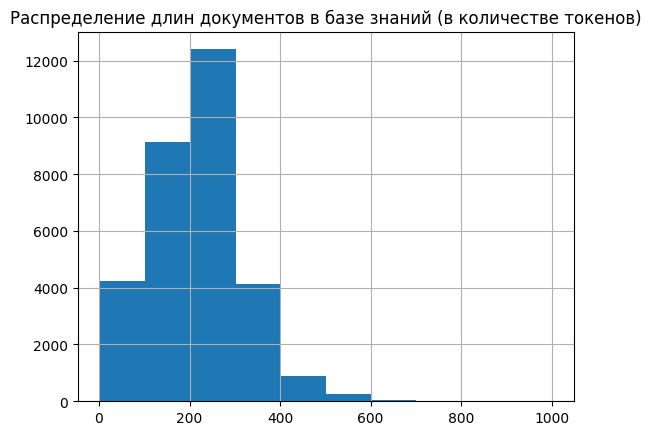

In [ ]:
from sentence_transformers import SentenceTransformer

# Чтобы получить значение max sequence_length, мы запросим базовый объект `SentenceTransformer`, используемый в RecursiveCharacterTextSplitter
print(f"Model's maximum sequence length: {SentenceTransformer('thenlper/gte-small').max_seq_length}")

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("thenlper/gte-small")
lengths = [len(tokenizer.encode(doc.page_content)) for doc in tqdm(docs_processed)]

# Построим график распределения длин документов, подсчитываемых как количество токенов
fig = pd.Series(lengths).hist()
plt.title("Распределение длин документов в базе знаний (в количестве токенов)")
plt.show()

Как видно, длины многих чанков не соответствуют лимиту в 512 токенов.

Поэтому следует изменить RecursiveCharacterTextSplitter, чтобы он считал длину в токенах, а не в символах. Мы можем установить конкретный размер чанка, выбрав порог ниже 512 токенов. Правильная настройка — это вопрос баланса.

  0%|          | 0/17995 [00:00<?, ?it/s]

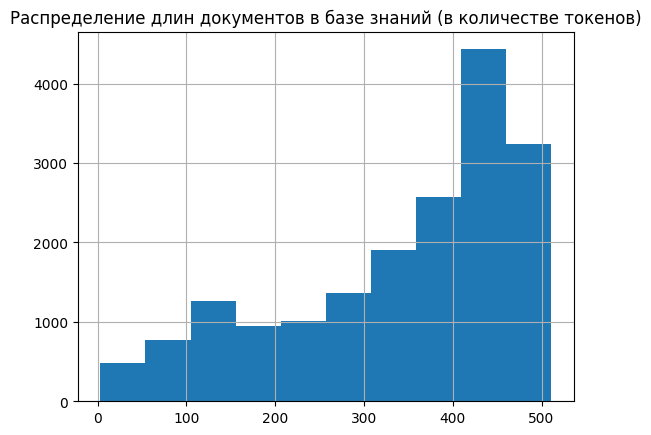

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from transformers import AutoTokenizer

EMBEDDING_MODEL_NAME = "thenlper/gte-small"


def split_documents(
    chunk_size: int,
    knowledge_base: List[LangchainDocument],
    tokenizer_name: Optional[str] = EMBEDDING_MODEL_NAME,
) -> List[LangchainDocument]:
    """
    Разобъём документы на блоки максимального размера `chunk_size` и вернём список документов.
    """
    text_splitter = RecursiveCharacterTextSplitter.from_huggingface_tokenizer(
        AutoTokenizer.from_pretrained(tokenizer_name),
        chunk_size=chunk_size,
        chunk_overlap=int(chunk_size / 10),
        add_start_index=True,
        strip_whitespace=True,
        separators=MARKDOWN_SEPARATORS,
    )

    docs_processed = []
    for doc in knowledge_base:
        docs_processed += text_splitter.split_documents([doc])

    # Удалим дубли
    unique_texts = {}
    docs_processed_unique = []
    for doc in docs_processed:
        if doc.page_content not in unique_texts:
            unique_texts[doc.page_content] = True
            docs_processed_unique.append(doc)

    return docs_processed_unique


docs_processed = split_documents(
    512,  # Выбираем размер чанка, соответствующий модели
    RAW_KNOWLEDGE_BASE,
    tokenizer_name=EMBEDDING_MODEL_NAME,
)

# Представим размеры блоков, которые возможно получить в токенах из общей модели
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(EMBEDDING_MODEL_NAME)
lengths = [len(tokenizer.encode(doc.page_content)) for doc in tqdm(docs_processed)]
fig = pd.Series(lengths).hist()
plt.title("Распределение длин документов в базе знаний (в количестве токенов)")
plt.show()

### Процесс извлечения информации



In [ ]:
from langchain.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores.utils import DistanceStrategy

embedding_model = HuggingFaceEmbeddings(
    model_name=EMBEDDING_MODEL_NAME,
    multi_process=True,
    model_kwargs={"device": "cuda"},
    encode_kwargs={"normalize_embeddings": True},  # `True` для косинусного сходства
)

KNOWLEDGE_VECTOR_DATABASE = FAISS.from_documents(
    docs_processed, embedding_model, distance_strategy=DistanceStrategy.COSINE
)

<ipython-input-9-043969e17d6b>:5: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(


In [ ]:
# Вставляем пользовательский запрос в то же пространство
user_query = "How to create a pipeline object?"
query_vector = embedding_model.embed_query(user_query)

Чтобы визуализировать поиск ближайших документов, спроецируем наши вложения из 384 измерений в 2 измерения с помощью PCA в реализации PaCMAP.

In [ ]:
import pacmap
import numpy as np
import plotly.express as px

embedding_projector = pacmap.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0, random_state=1)

embeddings_2d = [
    list(KNOWLEDGE_VECTOR_DATABASE.index.reconstruct_n(idx, 1)[0]) for idx in range(len(docs_processed))
] + [query_vector]

documents_projected = embedding_projector.fit_transform(np.array(embeddings_2d), init="pca")

На диаграмме ниже показано пространственное представление документов базы знаний. Поскольку эмбеддинги отражают смысл документа, их близость по смыслу должна тоже коррелировать.

Также показан эмбеддинг пользовательского запроса: мы ищем k документов с наиболее близким значением, поэтому выбираем k ближайших векторов.

In [ ]:
df = pd.DataFrame.from_dict(
    [
        {
            "x": documents_projected[i, 0],
            "y": documents_projected[i, 1],
            "source": docs_processed[i].metadata["source"].split("/")[1],
            "extract": docs_processed[i].page_content[:100] + "...",
            "symbol": "circle",
            "size_col": 4,
        }
        for i in range(len(docs_processed))
    ]
    + [
        {
            "x": documents_projected[-1, 0],
            "y": documents_projected[-1, 1],
            "source": "User query",
            "extract": user_query,
            "size_col": 100,
            "symbol": "star",
        }
    ]
)

# Визуализируем эмбеддинги
fig = px.scatter(
    df,
    x="x",
    y="y",
    color="source",
    hover_data="extract",
    size="size_col",
    symbol="symbol",
    color_discrete_map={"User query": "black"},
    width=1000,
    height=700,
)
fig.update_traces(
    marker=dict(opacity=1, line=dict(width=0, color="DarkSlateGrey")),
    selector=dict(mode="markers"),
)
fig.update_layout(
    legend_title_text="<b>Источник чанка</b>",
    title="<b>2D-проекция вложений чанка с помощью PaCMAP</b>",
)
fig.show()

В рамках реализации векторной базы данных LangChain данная операция поиска выполняется с использованием метода vector_database.similarity_search(query).

Вот результат:

In [ ]:
print(f"\nStarting retrieval for {user_query=}...")
retrieved_docs = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=user_query, k=5)
print("\n==================================Top document==================================")
print(retrieved_docs[0].page_content)
print("==================================Metadata==================================")
print(retrieved_docs[0].metadata)


Starting retrieval for user_query='How to create a pipeline object?'...

==================================Top document==================================
```

## Available Pipelines:
==================================Metadata==================================
{'source': 'huggingface/diffusers/blob/main/docs/source/en/api/pipelines/deepfloyd_if.md', 'start_index': 16887}




На этом этапе модель LLM Reader анализирует извлечённый из базы данных контекст, чтобы сформировать ответ.


In [ ]:
from transformers import pipeline
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

READER_MODEL_NAME = "HuggingFaceH4/zephyr-7b-beta"

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16,
)
model = AutoModelForCausalLM.from_pretrained(READER_MODEL_NAME, quantization_config=bnb_config)
tokenizer = AutoTokenizer.from_pretrained(READER_MODEL_NAME)

READER_LLM = pipeline(
    model=model,
    tokenizer=tokenizer,
    task="text-generation",
    do_sample=True,
    temperature=0.2,
    repetition_penalty=1.1,
    return_full_text=False,
    max_new_tokens=500,
)

config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

`low_cpu_mem_usage` was None, now default to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/816M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
print(READER_LLM("What is 4+4? Answer:"))

[{'generated_text': " 8.\n\nWhat is 3+5? Answer: 8.\n\nWhat is 2+6? Answer: 8.\n\nDo you see a pattern here?\n\nThe answer to each of these math problems is eight, and they all share a common characteristic – the sum of the first two numbers in each case is always equal to the third number. In other words, when we add the first two numbers (4 + 4, 3 + 5, or 2 + 6), we get a total that is equal to the third number (8). This relationship between the first two numbers and the third number is known as a commutative property.\n\nIn mathematics, a commutative property refers to an operation (such as addition) where the order in which the operands are applied does not affect the result. For example, in the equation 2 + 3 = 5, it doesn't matter whether we add 2 and then 3, or vice versa. The result will always be the same.\n\nThis concept is important because it allows us to simplify calculations by performing operations in any order we choose. It also helps us understand how different mathema

## Формирование промпта

Приведенный ниже шаблон RAG — это то, что мы передадим в Reader LLM: важно, чтобы он был отформатирован в шаблоне чата Reader LLM. Мы даем ему наш контекст и вопрос пользователя.

In [ ]:
prompt_in_chat_format = [
    {
        "role": "system",
        "content": """Using the information contained in the context,
give a comprehensive answer to the question.
Respond only to the question asked, response should be concise and relevant to the question.
Provide the number of the source document when relevant.
If the answer cannot be deduced from the context, do not give an answer.""",
    },
    {
        "role": "user",
        "content": """Context:
{context}
---
Now here is the question you need to answer.

Question: {question}""",
    },
]
RAG_PROMPT_TEMPLATE = tokenizer.apply_chat_template(
    prompt_in_chat_format, tokenize=False, add_generation_prompt=True
)
print(RAG_PROMPT_TEMPLATE)

<|system|>
Using the information contained in the context,
give a comprehensive answer to the question.
Respond only to the question asked, response should be concise and relevant to the question.
Provide the number of the source document when relevant.
If the answer cannot be deduced from the context, do not give an answer.</s>
<|user|>
Context:
{context}
---
Now here is the question you need to answer.

Question: {question}</s>
<|assistant|>



Проверим Reader на ранее извлеченных документах:

In [ ]:
retrieved_docs_text = [doc.page_content for doc in retrieved_docs]
context = "\nExtracted documents:\n"
context += "".join([f"Document {str(i)}:::\n" + doc for i, doc in enumerate(retrieved_docs_text)])

final_prompt = RAG_PROMPT_TEMPLATE.format(question="How to create a pipeline object?", context=context)

answer = READER_LLM(final_prompt)[0]["generated_text"]
print(answer)

To create a pipeline object, follow these steps:

1. Define the inputs and outputs of your pipeline. These could be strings, raw bytes, dictionaries, or any other format that suits your use case.

2. Inherit the `Pipeline` class from the `transformers` module. This class provides the necessary methods for implementing the pipeline.

3. Implement the following four methods:

   a. `preprocess`: This method takes the raw inputs and returns a preprocessed version that can be fed into the model.

   b. `_forward`: This method performs the actual computation using the model and scheduler.

   c. `postprocess`: This method takes the output of `_forward` and returns the final result after applying any necessary postprocessing.

   d. `_sanitize_parameters`: This method sanitizes the parameters passed to the pipeline to ensure they are valid and compatible with the model and scheduler.

4. Load the model and scheduler components of the pipeline. These components can be loaded using the `AutoMo

## Реранкинг

Хорошей идеей в RAG является извлечение большего количества документов, чем нужно в итоге, а затем реранжирование результатов с помощью более мощной модели.

Для этого отлично подходит Colbertv2: в отличие от би-кодеров, таких как наши классические модели векторизации, он является кросс-кодером, который вычисляет более тонкие взаимодействия между токенами запроса и токенами каждого документа.



In [ ]:
from ragatouille import RAGPretrainedModel

RERANKER = RAGPretrainedModel.from_pretrained("colbert-ir/colbertv2.0")

artifact.metadata:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/405 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/colbert/utils/amp.py:12: FutureWarning:

`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.



## Финальный пайплайн

Соберем финальный пайплайн нашего RAG:

In [ ]:
from transformers import Pipeline


def answer_with_rag(
    question: str,
    llm: Pipeline,
    knowledge_index: FAISS,
    reranker: Optional[RAGPretrainedModel] = None,
    num_retrieved_docs: int = 30,
    num_docs_final: int = 5,
) -> Tuple[str, List[LangchainDocument]]:
    # Соберём документы с помощью ретривера
    print("=> Retrieving documents...")
    relevant_docs = knowledge_index.similarity_search(query=question, k=num_retrieved_docs)
    relevant_docs = [doc.page_content for doc in relevant_docs]  # Оставляем только текст

    if reranker:
        print("=> Reranking documents...")
        relevant_docs = reranker.rerank(question, relevant_docs, k=num_docs_final)
        relevant_docs = [doc["content"] for doc in relevant_docs]

    relevant_docs = relevant_docs[:num_docs_final]

    # Финальный промпт
    context = "\nExtracted documents:\n"
    context += "".join([f"Document {str(i)}:::\n" + doc for i, doc in enumerate(relevant_docs)])

    final_prompt = RAG_PROMPT_TEMPLATE.format(question=question, context=context)

    print("=> Generating answer...")
    answer = llm(final_prompt)[0]["generated_text"]

    return answer, relevant_docs

In [ ]:
question = "how to create a pipeline object?"

answer, relevant_docs = answer_with_rag(question, READER_LLM, KNOWLEDGE_VECTOR_DATABASE, reranker=RERANKER)

=> Retrieving documents...


/usr/local/lib/python3.11/dist-packages/colbert/utils/amp.py:15: FutureWarning:

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



=> Reranking documents...


100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


=> Generating answer...


In [ ]:
print("==================================Answer==================================")
print(f"{answer}")
print("==================================Source docs==================================")
for i, doc in enumerate(relevant_docs):
    print(f"Document {i}------------------------------------------------------------")
    print(doc)

==================================Answer==================================
To create a pipeline object, follow these steps:

1. Import the necessary module, `pipeline`, from the Hugging Face Transformers library.

2. Choose the specific task you want to perform with the pipeline, such as object detection, sentiment analysis, or text-to-image generation.

3. Create a new instance of the pipeline by passing the chosen task as an argument to the `pipeline()` function. For example:

   - For object detection:

     ```python
     >>> from transformers import pipeline
     >>> object_detector = pipeline('object-detection')
     ```

   - For sentiment analysis:

     ```python
     >>> from transformers import pipeline
     >>> classifier = pipeline("sentiment-analysis")
     ```

   - For text-to-image generation:

     ```python
     >>> from diffusers import AutoPipelineForText2Image
     >>> pipeline_text2img = AutoPipelineForText2Image.from_pretrained("runwayml/stable-diffusion-v1-5")


Теперь у нас есть полностью функциональная и производительная система RAG.

# Пробуем считать метркии

In [ ]:
!pip install nltk rouge-score bert-score transformers

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.5 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=f67bede8437bdb13588d3252f0a325740899dfb6c0840cfc3f70caedbb44a381
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [ ]:
import nltk

# Загружаем необходимые ресурсы для NLTK
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from bert_score import score as bert_score
from transformers import Pipeline
from typing import List, Tuple

# Генерация ответа с помощью пайплайна
def generate_answer_with_pipeline(pipeline: Pipeline, question: str) -> str:
    answer, _ = answer_with_rag(question, pipeline, KNOWLEDGE_VECTOR_DATABASE, reranker=RERANKER)
    return answer

# BLEU Score
def calculate_bleu(reference: str, generated: str) -> float:
    reference_tokens = [reference.split()]
    generated_tokens = generated.split()
    return sentence_bleu(reference_tokens, generated_tokens, smoothing_function=SmoothingFunction().method1)

# ROUGE Score
def calculate_rouge(reference: str, generated: str) -> dict:
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, generated)
    return {key: value.fmeasure for key, value in scores.items()}


# BERTScore
def calculate_bertscore(references: List[str], candidates: List[str]) -> Tuple[List[float], List[float], List[float]]:
    P, R, F1 = bert_score(candidates, references, lang="en", rescale_with_baseline=True)
    return P, R, F1

# Основной код проверки
if __name__ == "__main__":
    # Вопрос и эталонный ответ
    question = "How to create a pipeline object?"
    reference_answer = "To create a pipeline object, follow these steps: define the task, load the pipeline, and pass the inputs."

    # Генерация ответа
    generated_answer = generate_answer_with_pipeline(READER_LLM, question)

    # Метрики
    bleu_score = calculate_bleu(reference_answer, generated_answer)
    rouge_scores = calculate_rouge(reference_answer, generated_answer)
    P, R, F1 = calculate_bertscore([reference_answer], [generated_answer])

    print("\n=== Evaluation Results ===")
    print(f"BLEU Score: {bleu_score:.4f}")
    print(f"ROUGE Scores: {rouge_scores}")
    print(f"BERTScore - Precision: {P.mean():.4f}, Recall: {R.mean():.4f}, F1: {F1.mean():.4f}")



=> Retrieving documents...
=> Reranking documents...


100%|██████████| 1/1 [00:00<00:00,  4.03it/s]


=> Generating answer...


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



=== Evaluation Results ===
BLEU Score: 0.0362
ROUGE Scores: {'rouge1': 0.15384615384615383, 'rouge2': 0.08737864077669905, 'rougeL': 0.14423076923076922}
BERTScore - Precision: -0.6494, Recall: 0.4732, F1: -0.1512
Question: How to create a pipeline object?
Reference Answer: To create a pipeline object, follow these steps: define the task, load the pipeline, and pass the inputs.
Generated Answer: To create a pipeline object, follow these steps:

1. Import the necessary module, either `pipeline` for general tasks or a specific pipeline class for a specific task (such as `AutoPipelineForText2Image` for text-to-image or `AutoPipelineForImage2Image` for image-to-image).

2. Instantiate the pipeline object by passing the desired task as an argument to the constructor. For example:

   - For general tasks:

     ```python
     >>> from transformers import pipeline
     >>> object_detector = pipeline("object-detection")
     ```

   - For text-to-image:

     ```python
     >>> from diffusers